<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import itertools
import matplotlib.patches as mpl_patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr, kendalltau, pearsonr

from sklearn.datasets import load_breast_cancer

In [2]:
def correlaciones(dataset_base: pd.DataFrame, columns: list, q: tuple =(0,1), mode: str ='scatter', alpha: float =0.5, grid: bool=False, calculate_coefficients: bool = True ) -> None:
    """
    OBJETIVO Y OUTPUT DE LA FUNCIÓN: 
    * Mostrar las correlaciones entre columnas numéricas continuas deseadas de un dataframe.
    * Cada fila representa la relación entre dos variables y contiene tres gráficos donde:
       - Izquierda: Gráfico de dispersión entre las mismas.
       - Centro y derecha: Distribución de las variables continuas utilizando histogramas.
    * Adicionalmente el gráfico de dispersión muestra un recuadro de texto con 
    el resultado de los coeficientes de correlación de Pearson, Spearman y Kendall.
    
    ENTRADAS:
       * dataset 
           - Dataframe con el cual se desea trabajar.
       * columns 
           - Lista de columnas que se desean analizar
       * q = (0,1) 
           - Rango intercuantílico a filtrar para el ploteo. Se aplica a variables numericas
           - Valor por defecto: (0,1). Toma todo el rango intercuantílico(no se elimina ningun dato).
       * mode
           - Transparencia de los puntos en el scatter plot.
           - scatter o hist
       * alpha
           - Cambiar la transparencia de los puntos en el grafico de dispersion
       * grid
           False: no se muestra la grilla de fondo
           True: se muestra la grilla
       * calculate_coefficients
           True: Calcula los coeficientes de correlación de Pearson, Spearman y Kendall.
           False: No calcula los coeficientes de correlación de Pearson, Spearman y Kendall.
    """

    #Se generan las combinaciones entre variables
    combinations = list(itertools.combinations(columns, 2))

    figura, axes = plt.subplots(len(combinations), 3, figsize=(20, (20*len(columns)//3)))

    for i, (col1, col2) in enumerate(combinations):
        
        dataset = dataset_base[
            (dataset_base[col1]>=dataset_base[col1].quantile(q[0])) & (dataset_base[col1]<=dataset_base[col1].quantile(q[1])) &
            (dataset_base[col2]>=dataset_base[col2].quantile(q[0])) & (dataset_base[col2]<=dataset_base[col2].quantile(q[1])) ][[col1,col2]]
        
        if mode == 'scatter':
            sns.scatterplot(data=dataset, x=col1, y=col2, ax=axes[i,0], linewidth = 0, alpha=alpha)
        elif mode == 'hist':
            sns.histplot(data=dataset, x=col1, y=col2, ax=axes[i,0])
        else:
            sns.scatterplot(data=dataset, x=col1, y=col2, ax=axes[i,0],  linewidth = 0, alpha=alpha)
            
        sns.histplot(data=dataset, x=col1, kde=True, linewidth = 0, ax=axes[i,1]).set_title(col1)  
        sns.histplot(data=dataset, x=col2, kde=True, linewidth = 0, ax=axes[i,2]).set_title(col2)
        
        if grid:
            axes[i,0].grid(); axes[i,0].tick_params(labelleft=True)
            axes[i,1].grid(); axes[i,1].set_xlabel('') 
            axes[i,2].grid(); axes[i,2].set_xlabel('')        
        
        
        #Para mostrar los resultados de lo coeficientes de correlación
        if calculate_coefficients:
            handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", lw=0, alpha=0)] * 4
            labels = []
            labels.append(f"pearson = {pearsonr(dataset[col1], dataset[col2])[0]:.4g}")
            labels.append(f"spearman = {spearmanr(dataset[col1], dataset[col2])[0]:.4g}")
            labels.append(f"kendall = {kendalltau(dataset[col1], dataset[col2])[0]:.4g}")
            labels.append(f"nulls = {dataset_base[[col1,col2]].isnull().any(axis=1).sum()}")

            axes[i,0].legend(handles, labels, loc='upper right', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
        else: 
            handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", lw=0, alpha=0)]
            labels= [f"nulls = {dataset_base[[col1,col2]].isnull().any(axis=1).sum()}"]
            axes[i,0].legend(handles, labels, loc='upper right', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
            pass
        
    
    figura.subplots_adjust(hspace=.5)
    plt.show()

Para visualizar como trabaja la función utilizaremos el dataset de cancer de sklearn.

In [3]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Como el dataset tiene muchas columnas, a modo de ejemplo solo utilizaremos las 6 primeras.

In [4]:
df.columns[:5]

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness'],
      dtype='object')

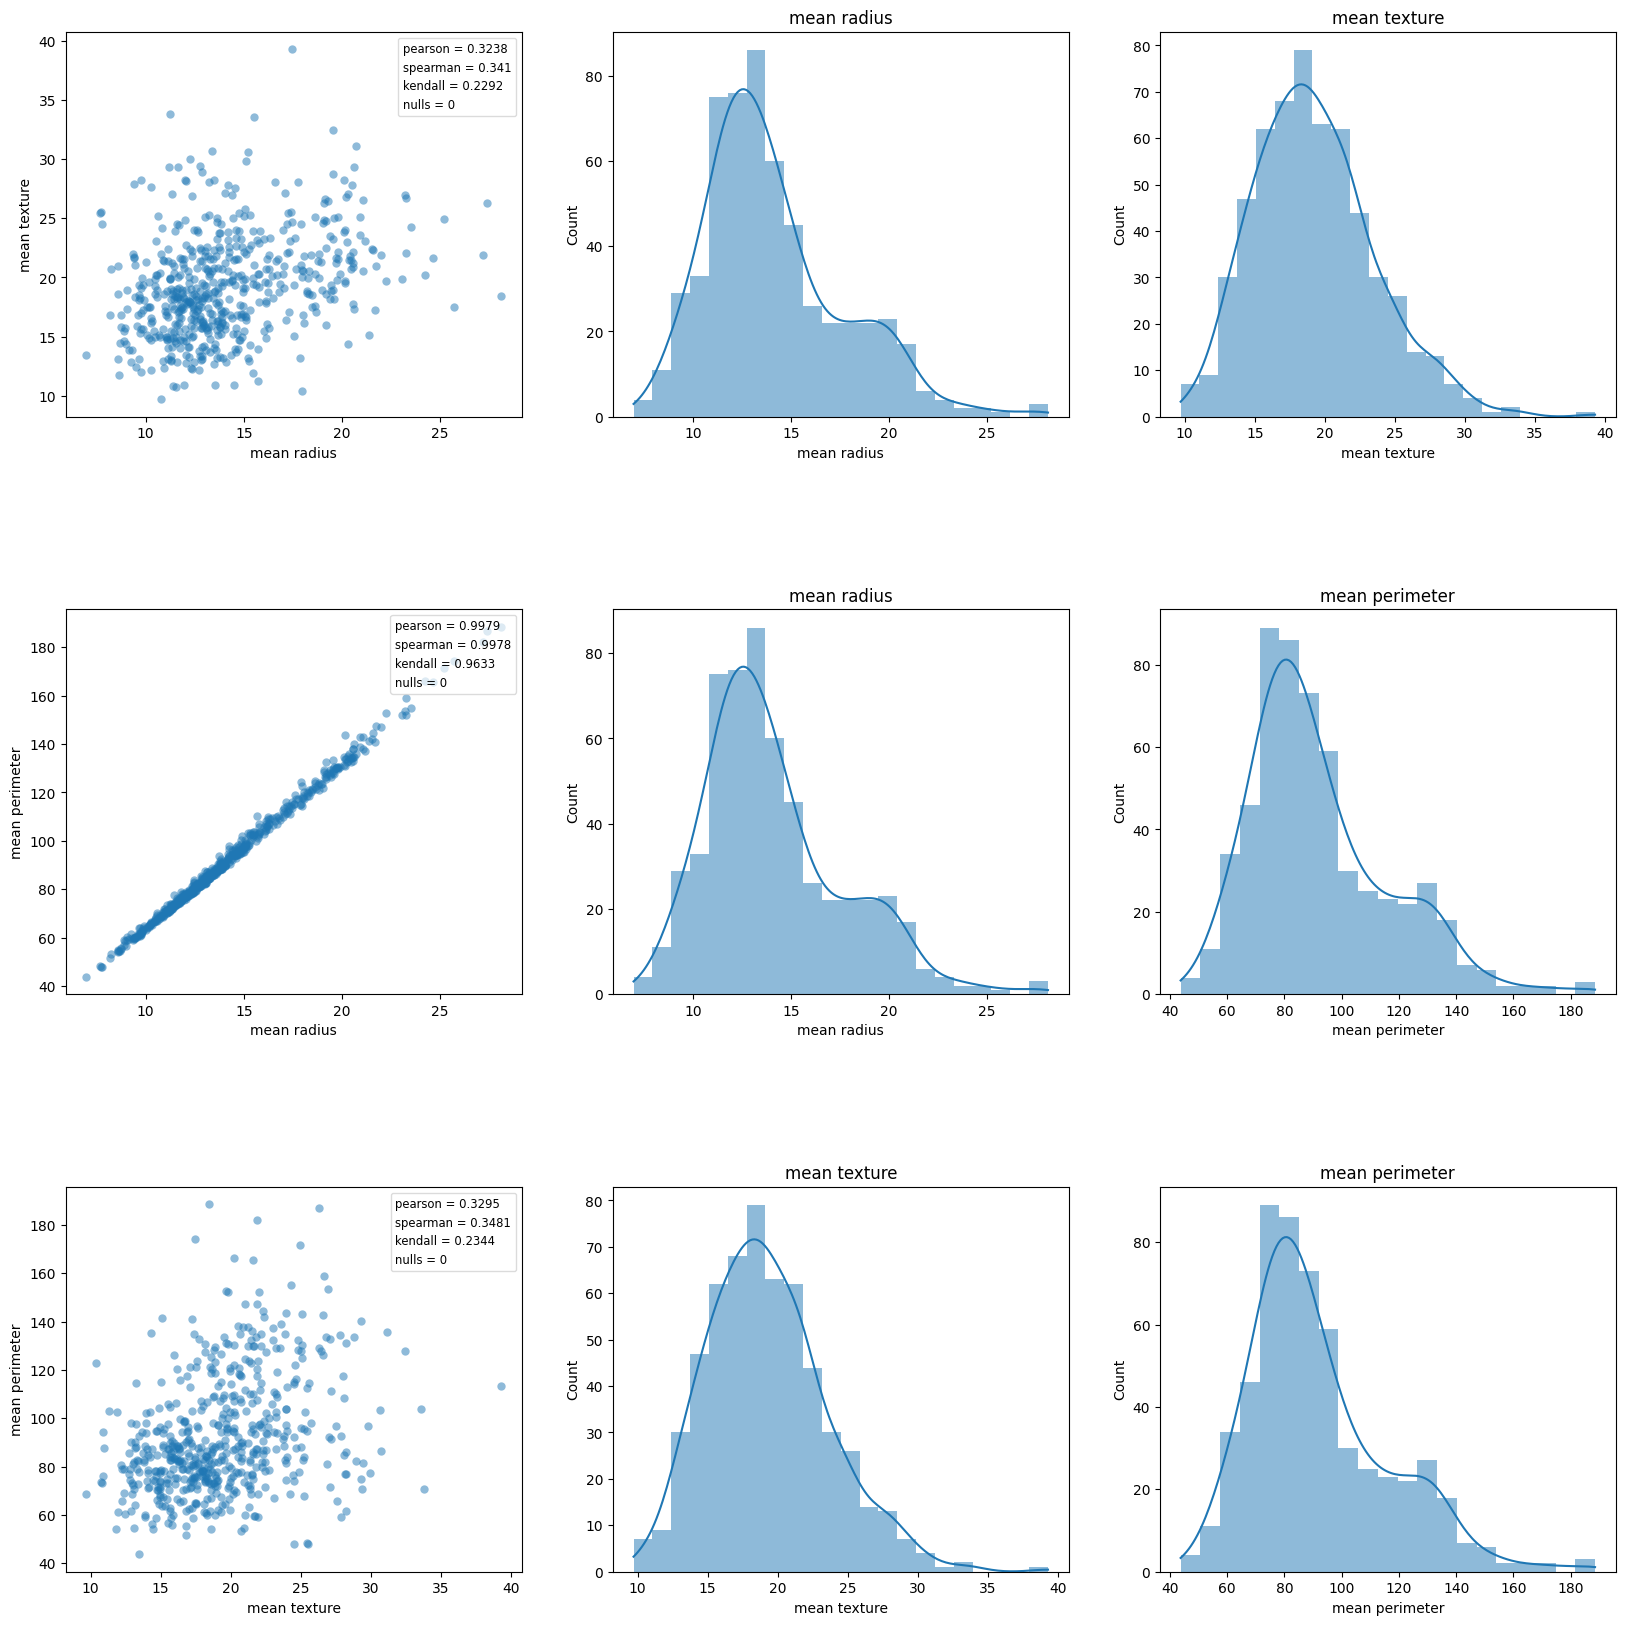

In [5]:
correlaciones(df, df.columns[:3])

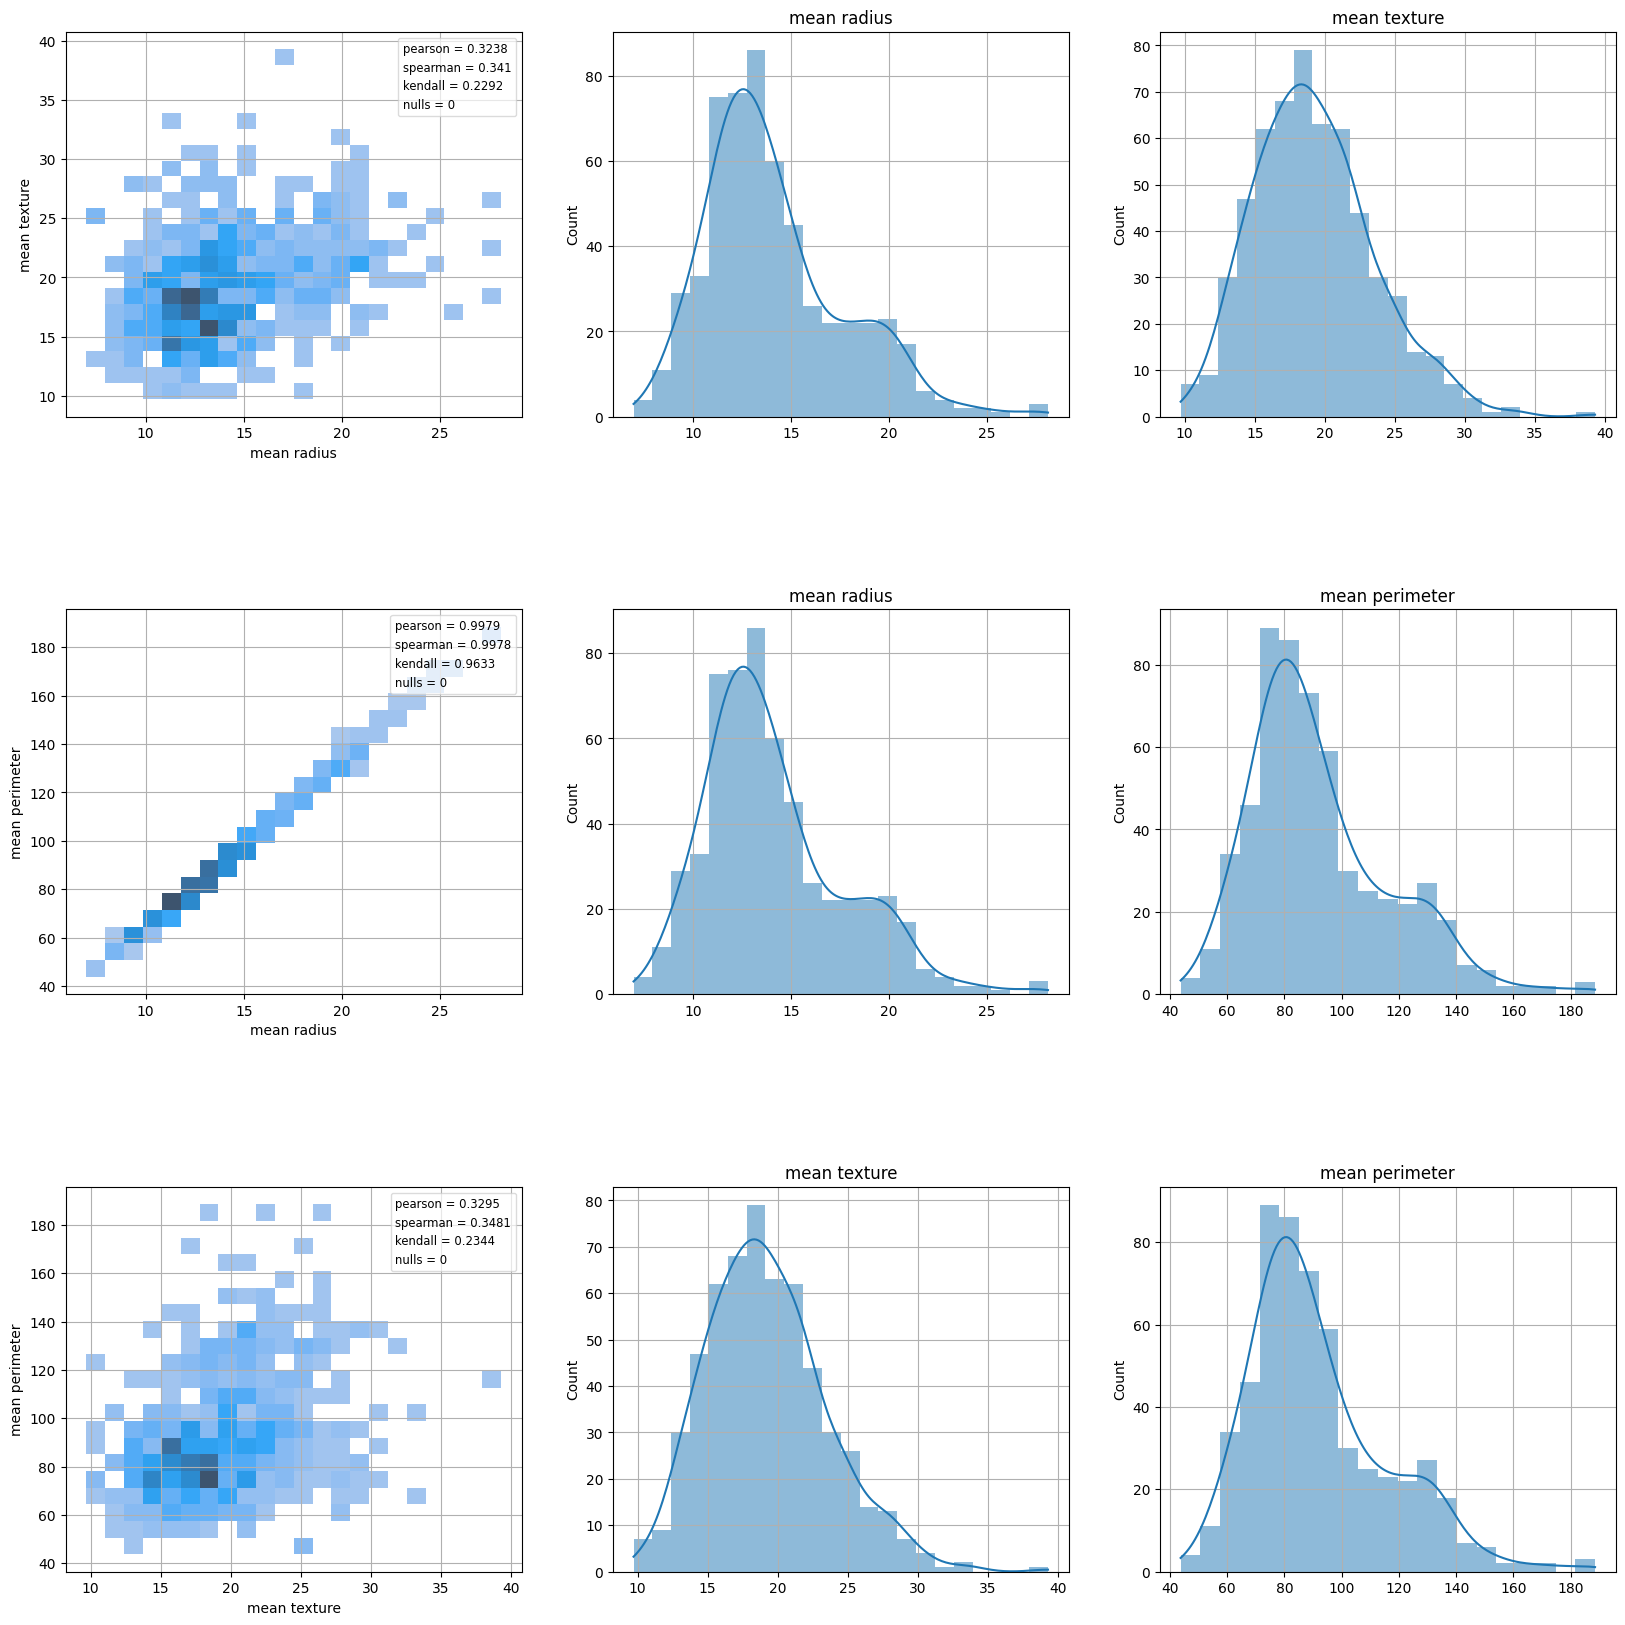

In [6]:
correlaciones(df, ['mean radius', 'mean texture', 'mean perimeter'], grid=True ,mode='hist')

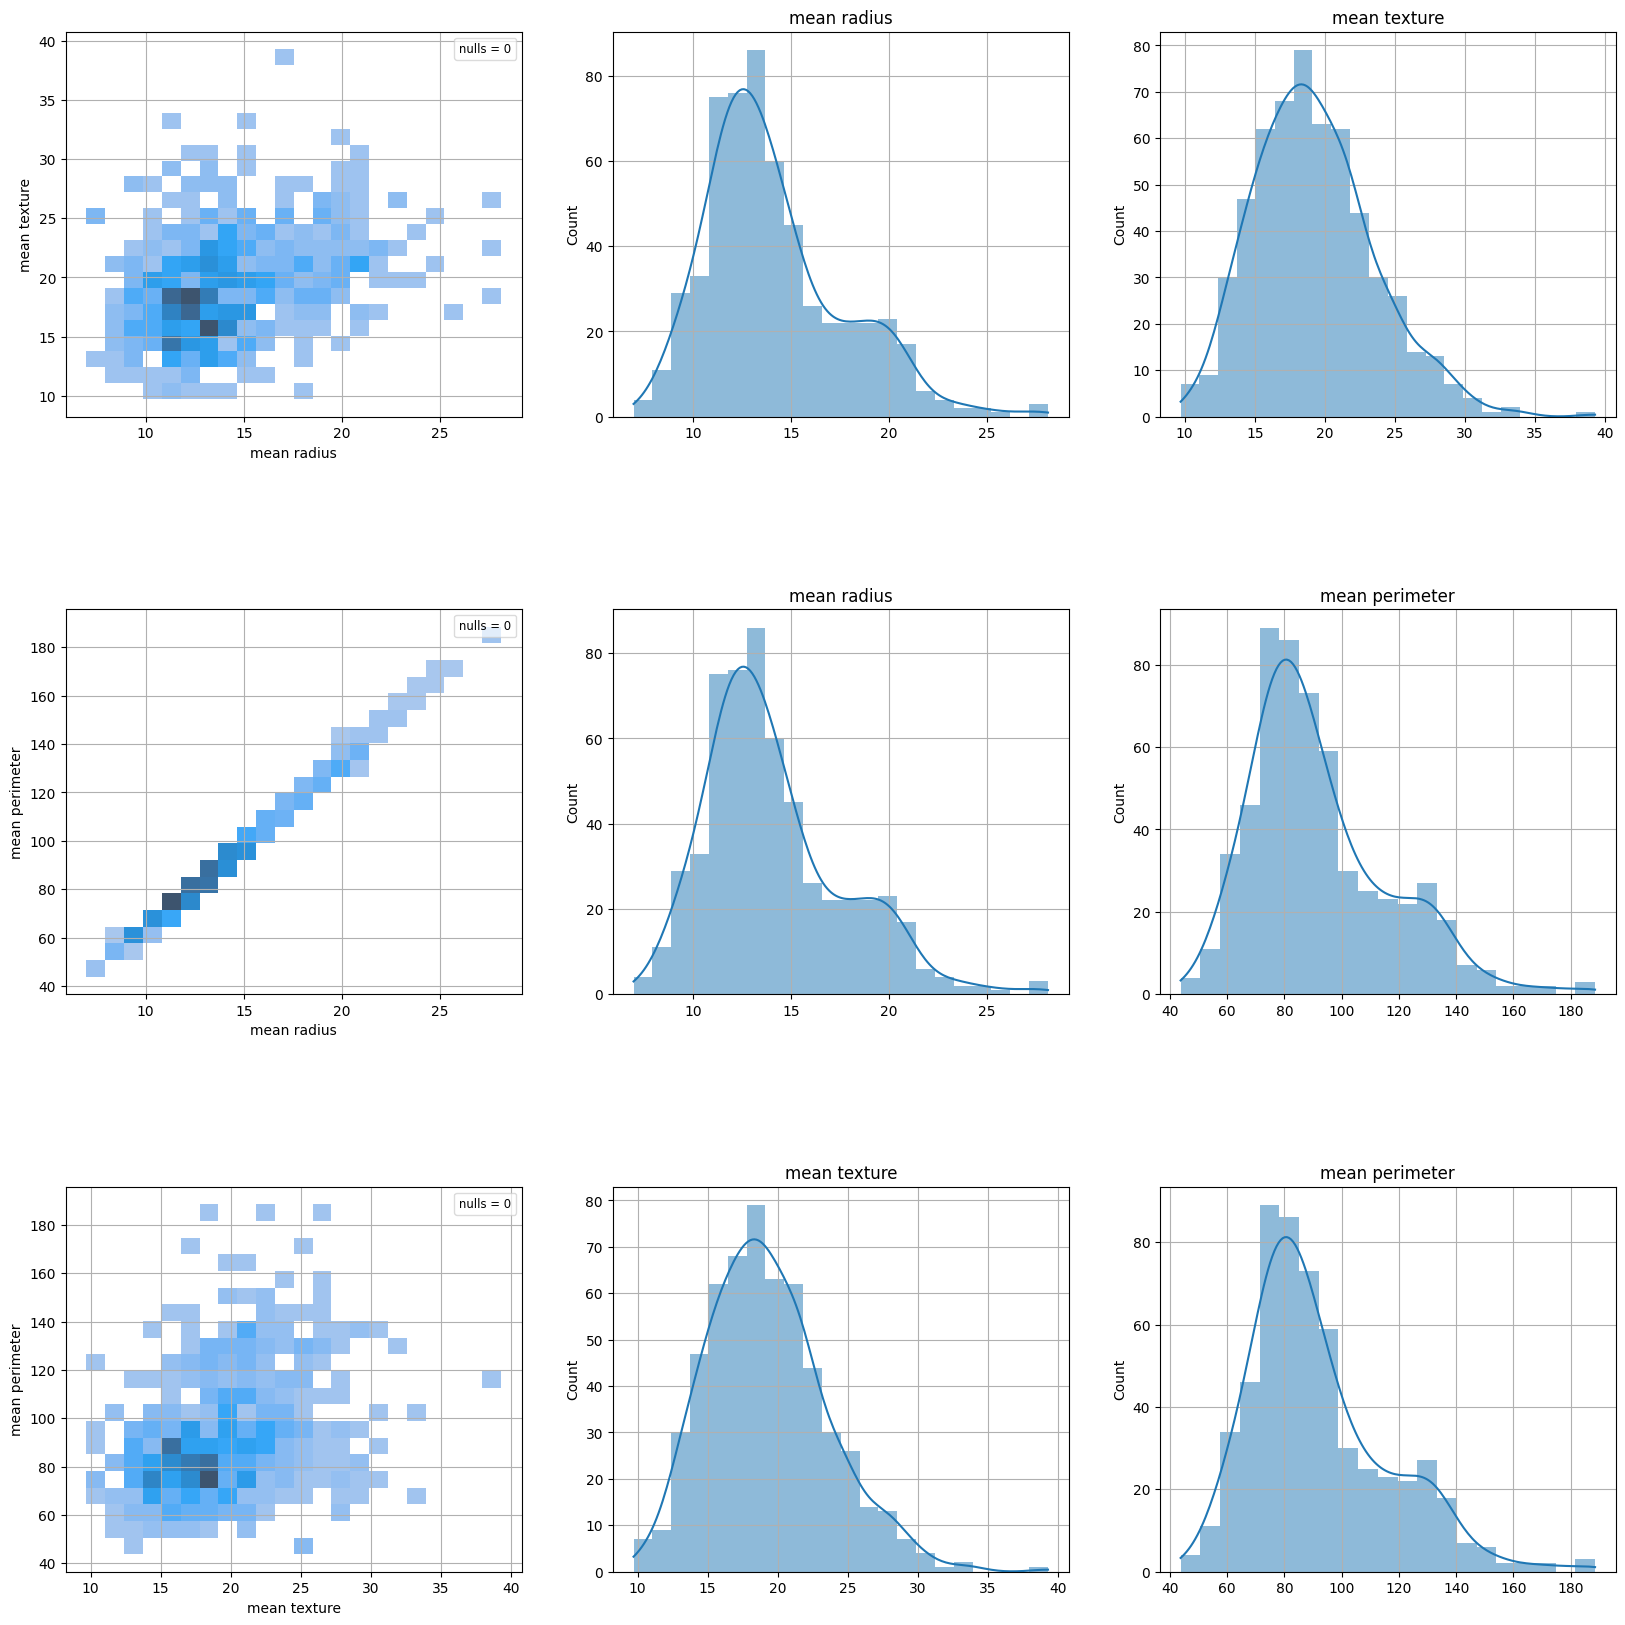

In [7]:
correlaciones(df, ['mean radius', 'mean texture', 'mean perimeter'], grid=True ,mode='hist', calculate_coefficients=False)